In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_values = pd.read_csv('/content/drive/MyDrive/train_values.csv')

train_labels = pd.read_csv('/content/drive/MyDrive/train_labels.csv')

In [8]:
data = train_values.merge(train_labels)

Seleccionamos características para el modelo

In [11]:
features_elegidos = ['ground_floor_type', 
                     'area_percentage', 
                     'height_percentage',
                     'count_families',
                     'has_superstructure_stone_flag',
                     'has_superstructure_adobe_mud',
                     'damage_grade']

train_values_short = data[features_elegidos]

In [13]:
train_values_short = pd.get_dummies(train_values_short)

In [32]:
train_values_short.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   area_percentage                260601 non-null  int64
 1   height_percentage              260601 non-null  int64
 2   count_families                 260601 non-null  int64
 3   has_superstructure_stone_flag  260601 non-null  int64
 4   has_superstructure_adobe_mud   260601 non-null  int64
 5   damage_grade                   260601 non-null  int64
 6   ground_floor_type_f            260601 non-null  uint8
 7   ground_floor_type_m            260601 non-null  uint8
 8   ground_floor_type_v            260601 non-null  uint8
 9   ground_floor_type_x            260601 non-null  uint8
 10  ground_floor_type_z            260601 non-null  uint8
dtypes: int64(6), uint8(5)
memory usage: 25.2 MB


In [17]:
# Dividimos los datos en entrenamiento y prueba

# x contiene los features independientes
x = train_values_short.drop(['damage_grade'], axis = 1)

# y contiene la variable dependiente damage_grade
y = train_values_short['damage_grade']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

**Random Forest**

In [20]:
# Creamos el modelo de Random Forest

rf_model = RandomForestClassifier(n_estimators = 20, random_state = 2018)

In [21]:
# Entrenamos los datos

rf_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=2018,
                       verbose=0, warm_start=False)

In [22]:
# Evaluamos los resultados

preds = rf_model.predict(x_test)
f1_score(y_test, preds, average = 'micro')

0.5708277693358506

Importancia de los Features

In [23]:
# Gini importance
rf_model.feature_importances_

array([0.30114889, 0.20915629, 0.06844356, 0.0280171 , 0.02579172,
       0.07060347, 0.00268557, 0.26074159, 0.02868597, 0.00472584])

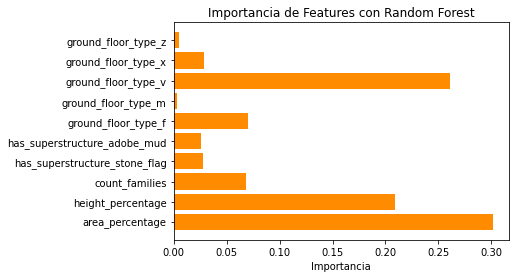

In [28]:
fig, ax = plt.subplots()

ax.barh(x_train.columns, rf_model.feature_importances_, color = 'darkorange')
ax.set_xlabel('Importancia')
ax.set_title('Importancia de Features con Random Forest')
plt.show()

Variando los hiperparámetros

In [29]:
rf_model1 = RandomForestClassifier(n_estimators = 5, random_state = 2018)

rf_model1.fit(x_train, y_train)

preds = rf_model1.predict(x_test)
f1_score(y_test, preds, average = 'micro')

0.5698147380700219

In [30]:
rf_model2 = RandomForestClassifier(n_estimators = 20, random_state = 2018, min_samples_leaf = 5)

rf_model2.fit(x_train, y_train)

preds = rf_model2.predict(x_test)
f1_score(y_test, preds, average = 'micro')

0.5729305766603736

In [31]:
rf_model3 = RandomForestClassifier(n_estimators = 50, random_state = 2018, min_samples_leaf = 5)

rf_model3.fit(x_train, y_train)

preds = rf_model3.predict(x_test)
f1_score(y_test, preds, average = 'micro')

0.5740050037604949

In [83]:
rf_model4 = RandomForestClassifier(n_estimators = 80, random_state = 2018, min_samples_leaf = 5)

rf_model4.fit(x_train, y_train)

preds = rf_model4.predict(x_test)
f1_score(y_test, preds, average = 'micro')

0.5740817485533607

Agregando más Features

In [92]:
nuevos_features = ['foundation_type',
                     'ground_floor_type', 
                     'area_percentage', 
                     'height_percentage',
                     'count_families',
                     'count_floors_pre_eq',
                     'plan_configuration',
                     'roof_type',
                     'has_superstructure_stone_flag',
                     'has_superstructure_adobe_mud',
                     'has_superstructure_mud_mortar_stone',
                     'has_superstructure_cement_mortar_stone',
                     'has_superstructure_cement_mortar_brick',
                     'has_superstructure_bamboo',
                     'has_superstructure_rc_non_engineered',
                     'has_superstructure_rc_engineered',
                     'land_surface_condition',
                     'has_secondary_use_agriculture',
                     'has_secondary_use_hotel',
                     'has_secondary_use_rental',
                     'has_secondary_use_other',
                     'damage_grade']

train_values_short1 = data[nuevos_features]

In [93]:
train_values_short1 = pd.get_dummies(train_values_short1)

In [94]:
# Dividimos los datos en entrenamiento y prueba

# x contiene los features independientes
x = train_values_short1.drop(['damage_grade'], axis = 1)

# y contiene la variable dependiente damage_grade
y = train_values_short1['damage_grade']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [95]:
rf_model = RandomForestClassifier(n_estimators = 80, random_state = 2018, min_samples_leaf = 5)

rf_model.fit(x_train, y_train)

preds = rf_model.predict(x_test)
f1_score(y_test, preds, average = 'micro')

0.6038894261024389

Preparamos la Submission

In [96]:
test_values = pd.read_csv('/content/drive/MyDrive/test_values.csv')

In [97]:
test_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86868 entries, 0 to 86867
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   building_id                             86868 non-null  int64 
 1   geo_level_1_id                          86868 non-null  int64 
 2   geo_level_2_id                          86868 non-null  int64 
 3   geo_level_3_id                          86868 non-null  int64 
 4   count_floors_pre_eq                     86868 non-null  int64 
 5   age                                     86868 non-null  int64 
 6   area_percentage                         86868 non-null  int64 
 7   height_percentage                       86868 non-null  int64 
 8   land_surface_condition                  86868 non-null  object
 9   foundation_type                         86868 non-null  object
 10  roof_type                               86868 non-null  object
 11  gr

In [99]:
selected_features = ['foundation_type',
                     'ground_floor_type', 
                     'area_percentage', 
                     'height_percentage',
                     'count_families',
                     'count_floors_pre_eq',
                     'plan_configuration',
                     'roof_type',
                     'has_superstructure_stone_flag',
                     'has_superstructure_adobe_mud',
                     'has_superstructure_mud_mortar_stone',
                     'has_superstructure_cement_mortar_stone',
                     'has_superstructure_cement_mortar_brick',
                     'has_superstructure_bamboo',
                     'has_superstructure_rc_non_engineered',
                     'has_superstructure_rc_engineered',
                     'land_surface_condition',
                     'has_secondary_use_agriculture',
                     'has_secondary_use_hotel',
                     'has_secondary_use_rental',
                     'has_secondary_use_other']

test_values_subset = test_values[selected_features]
test_values_subset = pd.get_dummies(test_values_subset)

In [100]:
test_values_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86868 entries, 0 to 86867
Data columns (total 42 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   area_percentage                         86868 non-null  int64
 1   height_percentage                       86868 non-null  int64
 2   count_families                          86868 non-null  int64
 3   count_floors_pre_eq                     86868 non-null  int64
 4   has_superstructure_stone_flag           86868 non-null  int64
 5   has_superstructure_adobe_mud            86868 non-null  int64
 6   has_superstructure_mud_mortar_stone     86868 non-null  int64
 7   has_superstructure_cement_mortar_stone  86868 non-null  int64
 8   has_superstructure_cement_mortar_brick  86868 non-null  int64
 9   has_superstructure_bamboo               86868 non-null  int64
 10  has_superstructure_rc_non_engineered    86868 non-null  int64
 11  has_superstruct

In [101]:
predictions = rf_model.predict(test_values_subset)

In [102]:
submission_format = pd.read_csv('/content/drive/MyDrive/submission_format.csv', index_col = 'building_id')

In [103]:
submission_format.head()

,damage_grade
building_id,
300051,1
99355,1
890251,1
745817,1
421793,1


In [104]:
my_submission = pd.DataFrame(data = predictions,
                             columns = submission_format.columns,
                             index = submission_format.index)

In [105]:
my_submission.value_counts()

damage_grade
2               72557
3               10310
1                4001
dtype: int64

In [108]:
my_submission.to_csv('/content/drive/MyDrive/submission.csv')

In [109]:
!head submission.csv

building_id,damage_grade
300051,3
99355,2
890251,2
745817,2
421793,3
871976,3
691228,2
896100,2
343471,2
